In [173]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
!pip install openpyxl

In [174]:
def nagy1973(x, y, z):
    from math import log, sqrt, atan

    # computes the total gravitational atraction of a rightrectangular Prism
    # input x =  tuple with x1 and x2 coordinates
    #       y =  tuple with y1 and y2 coordinates
    #       z =  tuple with z1 and z2 coordinates
    # output GravCorrect = a terrain correction for a right rectangular prims.
    def Fz(a,b,c):
        # this is the numerical method for the gravitational
        # attraction over the Z component
        # input a = x
        #       b = y
        #       b = z
        # output F = GravCorrect    terrain correction
        a = abs(a)
        b = abs(b)
        c = abs(c)
        r = sqrt(a**2 + b**2 + c**2)
        r0 = sqrt(a**2 + b**2)

        GravCorrect = a * log((b+r0)/(b+r)) + b * log((a + r0)/(a + r)) + c* atan(a*b/(c*r))
        return GravCorrect

    GravCorrAcum = 0 # this gives total z component of a prism
    for k in range(1, 3):

        for j in range(1, len(y)+1):

            for i in range(1, len(x)+1):

                if x[i-1] < 0:
                    sgnX = -1
                elif x[i-1] == 0:
                    sgnX = 0
                else:
                    sgnX = 1

                if y[j-1] < 0:
                    sgnY = -1
                elif y[j-1] == 0:
                    sgnY = 0
                else:
                    sgnY = 1

                sgnIJK = (-1)**(i+j+k)

                RealSign = sgnIJK * sgnX * sgnY

                #print(sgnIJK, sgnX, sgnY, RealSign)

                GravCorr = Fz(x[i-1], y[j-1], z[k-1])

                FinalFz =  RealSign * GravCorr

                GravCorrAcum += FinalFz*6.67408e-11*2600*100000 #multiply by the gravitational constant 
                                                                #density 2600 kg/m3,100000 conversion constant to miligals 
                                                                # output miligals
               # print  FinalFz, GravCorrAcum

    return GravCorrAcum

In [175]:
#Test
x= (-500, 500)
y = (500, 1500)
z = (500, 1500)
FZ1 = nagy1973(x, y, z)
print(FZ1) 

4.816828622171862


In [176]:
data = pd.read_excel("data.xlsx")
data.describe()

,longitude,latitude,elevation,gravity,X,Y,Z
count,31.000000,31.000000,31.000000,31.000000,3.100000e+01,31.000000,3.100000e+01
mean,2.293832,47.462631,29.412903,4780.952935,4.290293e+06,186866.507161,4.700023e+06
std,0.001261,0.001378,9.045600,2.340924,3.183903e+02,258.612982,2.860905e+02
min,2.290378,47.460964,13.720000,4777.442000,4.289654e+06,186164.275000,4.699677e+06
25%,2.293700,47.461547,21.060000,4778.887000,4.290044e+06,186829.938000,4.699798e+06
50%,2.294117,47.462103,29.160000,4781.331000,4.290405e+06,186915.526000,4.699914e+06
75%,2.294817,47.463713,36.745000,4782.937500,4.290552e+06,187071.261000,4.700248e+06
max,2.295173,47.465431,43.720000,4785.112000,4.290698e+06,187162.000000,4.700605e+06


In [177]:
#R = 6371
#X = R * np.cos(data.latitude) * np.cos(data.longitude)
#Y = R * np.cos(data.latitude) * np.sin(data.longitude)
#Z = R * np.sin(data.longitude)
#data = data.assign(X_1=X_1*1e3, Y_1=Y_1*1e3, Z_1=Z_1*1e3)

#data.head()

In [178]:
chain =[]
for i in range(len(data.latitude)):
    x = (data.X[i]-3000, data.X[i]+3000)
    y = (data.Y[i]-3000, data.Y[i]+3000)
    z = (data.Z[i]-3000, data.Z[i]+3000)
    #resultat en mGal, convertir en uGal
    FZ1 = nagy1973(x, y, z)*1000
    chain.append(FZ1)
data = data.assign(Topo_corr = chain)
data = data.assign(Bouguer_Anomaly= data.gravity+data.Topo_corr)
data.head(34)

,longitude,latitude,elevation,gravity,X,Y,Z,Topo_corr,Bouguer_Anomaly
0,2.294606,47.461904,13.72,4785.112,4290452.304,187034.621,4699872.473,0.068267,4785.180267
1,2.294367,47.461850,17.66,4784.397,4290466.809,186985.437,4699861.264,0.068267,4784.465267
2,2.294025,47.461741,15.46,4784.181,4290494.659,186915.526,4699838.772,0.068267,4784.249267
3,2.293686,47.461640,20.61,4783.161,4290520.852,186845.843,4699817.773,0.068266,4783.229266
4,2.293287,47.461549,24.73,4782.228,4290545.353,186763.856,4699798.793,0.068266,4782.296266
5,2.292758,47.461554,29.16,4781.381,4290549.074,186653.730,4699799.764,0.068266,4781.449266
6,2.292299,47.461546,29.96,4781.331,4290555.032,186558.407,4699798.120,0.068266,4781.399266
7,2.291794,47.461437,29.48,4781.396,4290584.360,186454.344,4699775.627,0.068266,4781.464266
8,2.291396,47.461299,26.39,4781.990,4290619.458,186372.965,4699747.006,0.068265,4782.058265
9,2.290923,47.461127,21.05,4783.292,4290663.043,186276.347,4699711.286,0.068265,4783.360265


C:\Users\dell\AppData\Local\Temp\ipykernel_4092\113239667.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(orientation="vertical").ax.set_title('AB_C (uGal)')


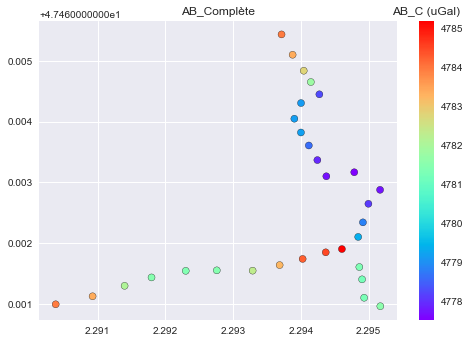

In [172]:
plt.scatter(data.longitude, data.latitude, c=data.Bouguer_Anomaly, cmap="rainbow", edgecolor='k')
plt.style.use("seaborn")
plt.colorbar(orientation="vertical").ax.set_title('AB_C (uGal)')
plt.title('AB_Complète')
plt.show()

In [132]:
data.to_excel('AB_Corr_terrain.xlsx') # save dataframe result as xlsx file excel file